In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("paper")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [ ]:
import os
if not os.path.exists('./files'):
        os.makedirs('./files')

## Compare different models for 100 runs $(t_0=10)$

In [15]:
deepest = "500_400_250_100_50"
medium = "500_250_100_50"
shallowest = "500_250_50"

In [16]:
deepest_loss = np.load("./files/training_t0_10/losses_" + deepest + ".npz")
medium_loss = np.load("./files/training_t0_10/losses_" + medium + ".npz")
shallowest_loss = np.load("./files/training_t0_10/losses_" + shallowest + ".npz")

In [17]:
deepest_train_loss = deepest_loss['train_loss']
deepest_test_loss = deepest_loss['test_loss']

medium_train_loss = medium_loss['train_loss']
medium_test_loss = medium_loss['test_loss']

shallowest_train_loss = shallowest_loss['train_loss']
shallowest_test_loss = shallowest_loss['test_loss']


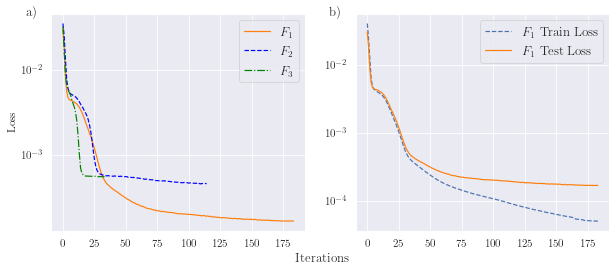

In [18]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(shallowest_test_loss, label='$F_1$', color='tab:orange')
ax1.plot(medium_test_loss, label='$F_2$', color='blue', linestyle='--')
ax1.plot(deepest_test_loss, label='$F_3$', color='green', linestyle='-.')
ax1.set_yscale('log')
ax1.legend(fontsize=13)
ax1.set_ylabel('Loss', fontsize=11)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)

ax2.plot(shallowest_train_loss, label='$F_1$ Train Loss', color='b', linestyle='--')
ax2.plot(shallowest_test_loss, label='$F_1$ Test Loss', color='tab:orange')
ax2.legend(fontsize=13)
ax2.set_yscale('log')
plt.setp(ax2.get_xticklabels(), fontsize=11)
plt.setp(ax2.get_yticklabels(), fontsize=11)

f.text(0.5, 0.02, 'Iterations', ha='center', fontsize=13)
f.text(0.09, 0.87, 'a)', fontsize=13)
f.text(0.51, 0.87, 'b)', fontsize=13)

plt.show()
f.savefig("./figures/nn_model_compare.pdf",dpi=300)

## Compare NN with LW for t0=10

In [19]:
nn_t0_10 = np.load("./files/t0_10_500_runs/results_500_250_50.npz")
lw_t0_10 = np.load("./files/t0_10_500_runs/results_lw.npz")

In [20]:
nn_t0_10_mse = nn_t0_10["median_se"]
lw_t0_10_mse = lw_t0_10["median_se"]

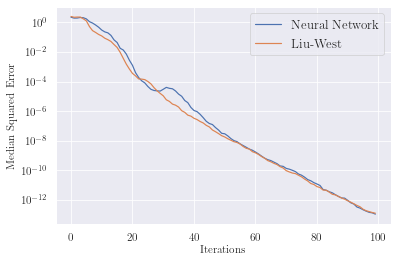

In [21]:
f = plt.figure()
ax = plt.gca()
plt.plot(nn_t0_10_mse,label='Neural Network')
plt.plot(lw_t0_10_mse, label='Liu-West')
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
plt.yscale('log')
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Median Squared Error', fontsize=11)
plt.legend(fontsize=13)
plt.show()

#f.savefig("./figures/nn_vs_lw_t0_10.pdf",dpi=300)

## Compare NN with LW for t0=0.1

In [22]:
nn_t0_10 = np.load("./files/t0_point_1_500_runs/results_500_250_50.npz")
lw_t0_10 = np.load("./files/t0_point_1_500_runs/results_lw.npz")

In [23]:
nn_t0_point_1_mse = nn_t0_10["median_se"]
lw_t0_point_1_mse = lw_t0_10["median_se"]

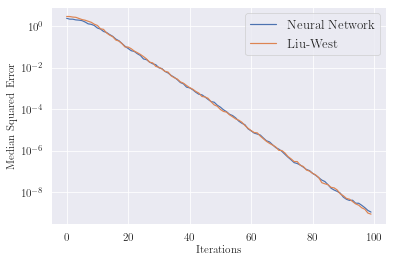

In [24]:
f = plt.figure()
ax = plt.gca()
plt.plot(nn_t0_point_1_mse,label='Neural Network')
plt.plot(lw_t0_point_1_mse, label='Liu-West')
plt.setp(ax.get_xticklabels(), fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
plt.yscale('log')
plt.xlabel('Iterations', fontsize=11)
plt.ylabel('Median Squared Error', fontsize=11)
plt.legend(fontsize=13)
plt.show()

#f.savefig("./figures/nn_vs_lw_easy.pdf",dpi=300)

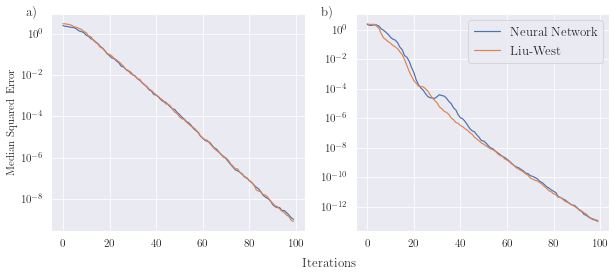

In [25]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.plot(nn_t0_point_1_mse,label='Neural Network')
ax1.plot(lw_t0_point_1_mse, label='Liu-West')
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
ax1.set_yscale('log')
ax1.set_ylabel('Median Squared Error', fontsize=11)

ax2.plot(nn_t0_10_mse,label='Neural Network')
ax2.plot(lw_t0_10_mse, label='Liu-West')
plt.setp(ax2.get_xticklabels(), fontsize=11)
plt.setp(ax2.get_yticklabels(), fontsize=11)
ax2.set_yscale('log')

f.text(0.51, 0.00, 'Iterations', ha='center', fontsize=13)
f.text(0.09, 0.87, 'a)', fontsize=13)
f.text(0.50, 0.87, 'b)', fontsize=13)

plt.legend(fontsize=13)
plt.show()

f.savefig("./figures/nn_vs_lw.pdf",dpi=300)

## Plot standard deviation plots for pass fail

In [26]:
results_pass_fail = np.load("./files/results_pass_fail.npz")
passed_std = results_pass_fail["passed_std"]
failed_std = results_pass_fail["failed_std"]

No handles with labels found to put in legend.


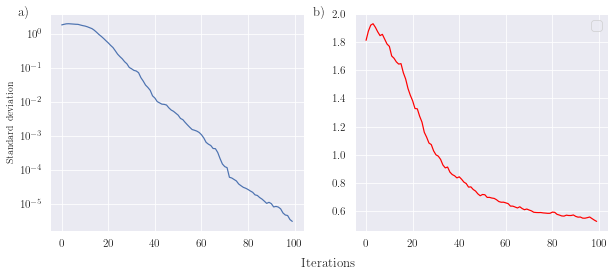

In [27]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.plot(passed_std)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
ax1.set_yscale('log')
ax1.set_ylabel("Standard deviation")

ax2.plot(failed_std, color='red')
plt.setp(ax2.get_xticklabels(), fontsize=11)
plt.setp(ax2.get_yticklabels(), fontsize=11)

f.text(0.51, 0.00, 'Iterations', ha='center', fontsize=13)
f.text(0.08, 0.87, 'a)', fontsize=13)
f.text(0.49, 0.87, 'b)', fontsize=13)

plt.show()

f.savefig("./figures/passed_vs_failed.pdf",dpi=300)